<a href="https://colab.research.google.com/github/oaalikouche12-bot/stroke-risk-exploration/blob/main/Stroke_Prediction_Dataset_(Healthcare).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##🧠 Exploratory Data Analysis (EDA) – Stroke Prediction Dataset

El objetivo de este análisis es explorar un dataset sanitario utilizado para estudiar los factores que influyen en la probabilidad de sufrir un accidente cerebrovascular (stroke).

El dataset contiene 5.110 pacientes y 12 variables, incluidas:

Demográficas: age, gender, ever_married, Residence_type

Clínicas: hypertension, heart_disease, avg_glucose_level, bmi

Sociales: work_type, smoking_status

Variable objetivo: stroke (1 = el paciente sufrió un derrame, 0 = no)

A través de este EDA buscamos:

Comprender la calidad de los datos (nulos, duplicados, outliers)

Analizar cada variable individualmente (univariate analysis)

Estudiar cómo se relacionan con la variable objetivo stroke

Identificar patrones relevantes en salud pública, como el impacto de la edad, la glucosa o enfermedades previas

Construir visualizaciones claras y útiles para un análisis profesional

Este EDA proporciona una base sólida para futuras tareas de modelado predictivo, como un clasificador de riesgo de stroke.

In [11]:
import warnings
warnings.filterwarnings("ignore")


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Cargar el dataset
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

df.head()
2

2

## CÓDIGO — Exploración inicial

In [13]:
# Tamaño del dataset
df.shape


(5110, 12)

In [14]:
# Información general
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
# Resumen estadístico
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
# Porcentaje de valores nulos
df.isna().mean().sort_values(ascending=False)


,0
bmi,0.039335
id,0.000000
age,0.000000
gender,0.000000
hypertension,0.000000
heart_disease,0.000000
work_type,0.000000
ever_married,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000


## Análisis Univariante (Exploración de cada variable)

En esta sección analizamos cada variable del dataset por separado para comprender su distribución, detectar valores atípicos y obtener una primera idea de los patrones presentes en los datos.

Nos enfocamos especialmente en:

Edad

Nivel de glucosa

Índice de masa corporal (BMI)

Variables clínicas (hipertensión, enfermedad cardíaca)

Variables categóricas relacionadas con estilo de vida (tabaquismo, tipo de trabajo, estado civil)

Este análisis nos ayuda a identificar factores que, potencialmente, pueden estar asociados con un mayor riesgo de sufrir un stroke.

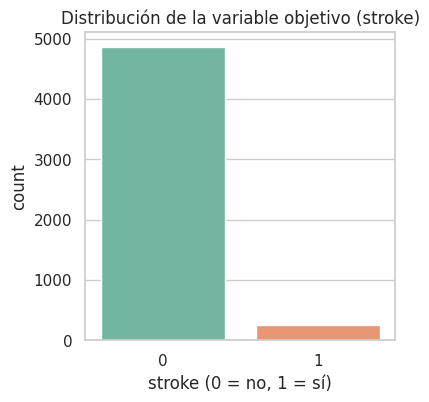

,proportion
stroke,
0,0.951272
1,0.048728


In [17]:
# CELDA DE CÓDIGO → Distribución variable objetivo (stroke)
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='stroke', palette='Set2')
plt.title('Distribución de la variable objetivo (stroke)')
plt.xlabel('stroke (0 = no, 1 = sí)')
plt.show()

df['stroke'].value_counts(normalize=True)


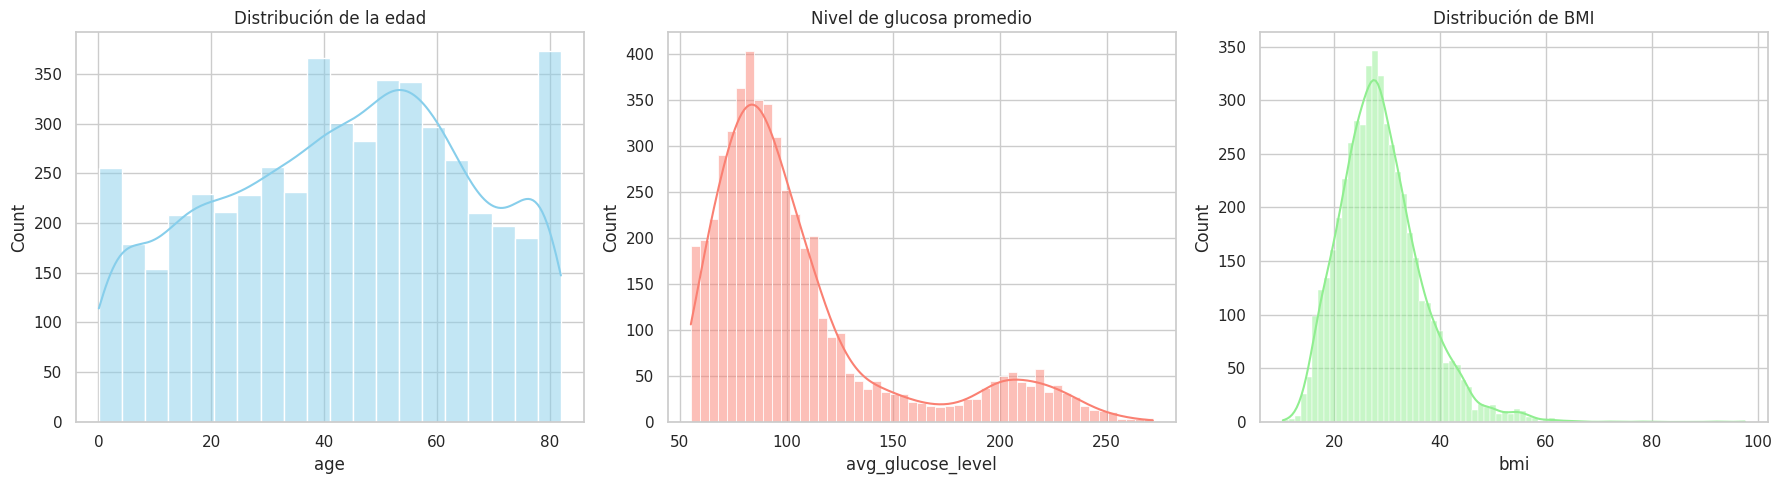

In [18]:
# Distribución de edad, glucosa y BMI
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(df['age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de la edad')

sns.histplot(df['avg_glucose_level'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Nivel de glucosa promedio')

sns.histplot(df['bmi'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribución de BMI')

plt.tight_layout()
plt.show()


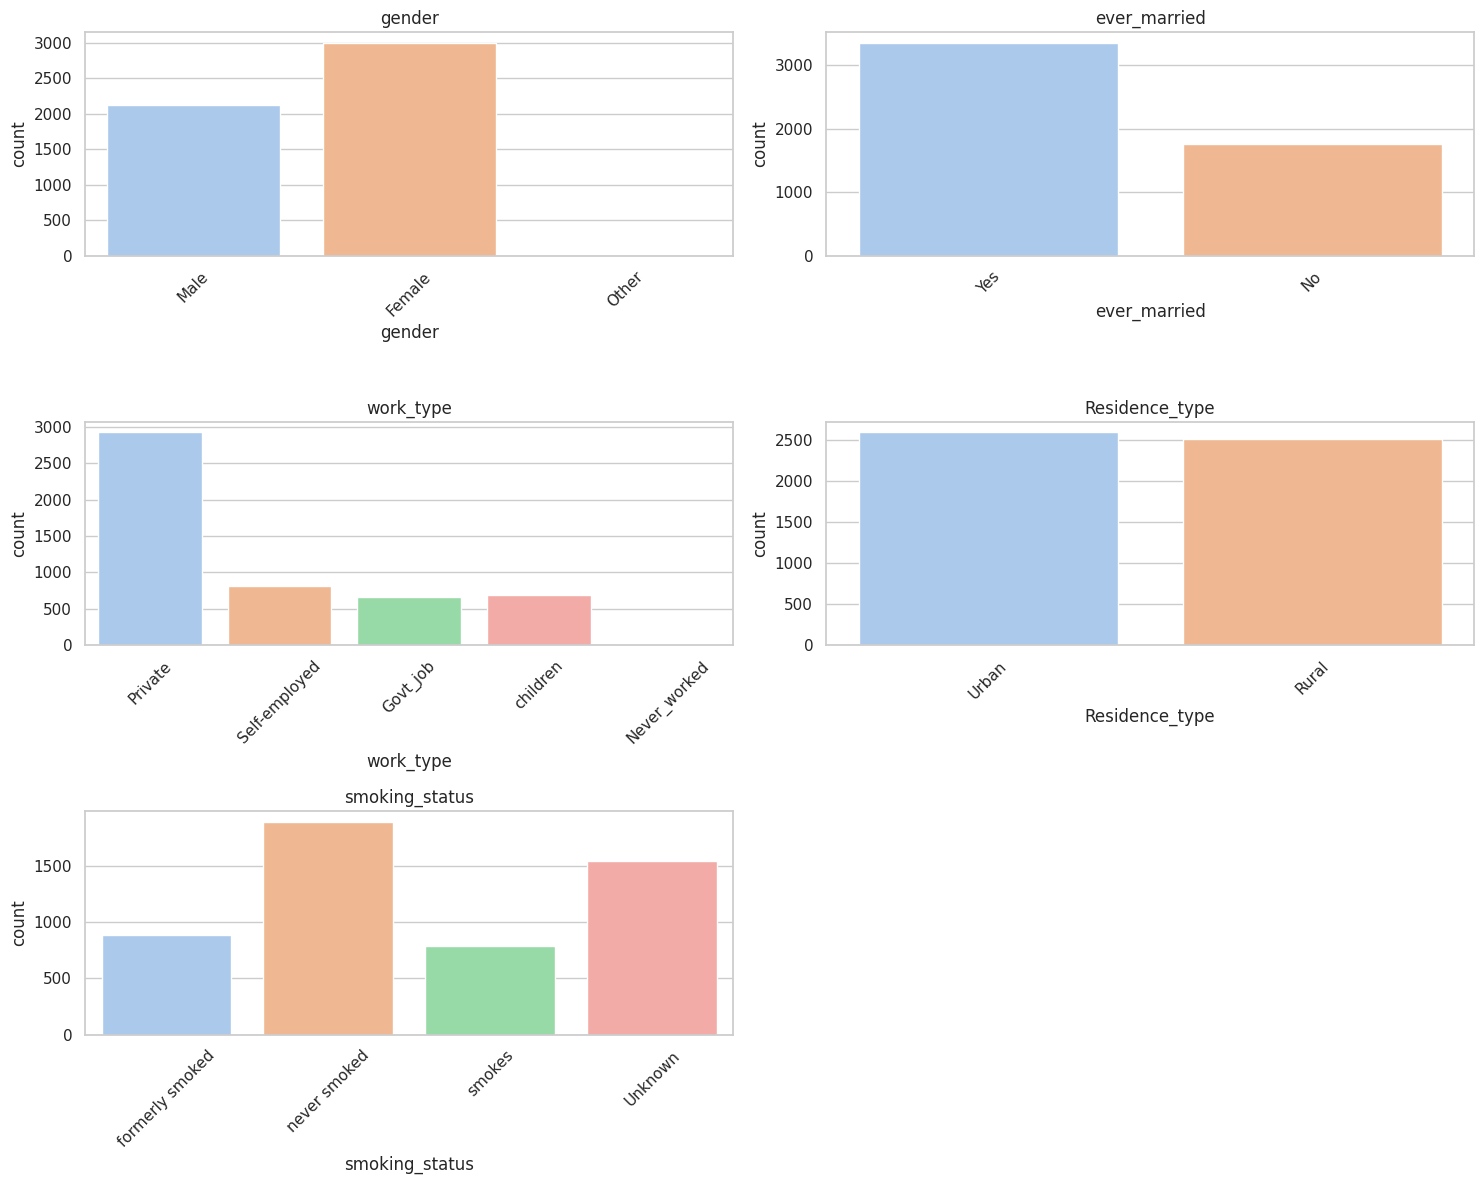

In [19]:
# CELDA DE CÓDIGO → Variables categóricas
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15,12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
import warnings
warnings.filterwarnings("ignore")


## Análisis Bivariante (Relación entre variables y stroke)

En esta sección analizamos cómo se relaciona cada variable con la variable objetivo stroke.
El objetivo es identificar patrones, diferencias entre grupos y posibles factores de riesgo.

Nos centraremos en variables clínicas clave como:

Edad

Nivel de glucosa

BMI

Hipertensión

Enfermedad cardíaca

Tabaquismo

Estas variables pueden tener un impacto directo en la probabilidad de sufrir un accidente cerebrovascular (stroke).

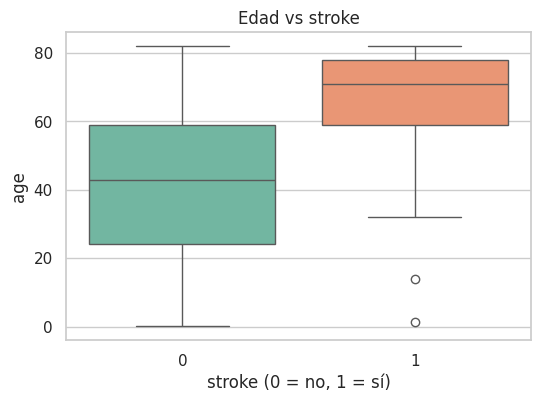

In [20]:
# Edad vs Stroke
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='stroke', y='age', palette='Set2')
plt.title('Edad vs stroke')
plt.xlabel('stroke (0 = no, 1 = sí)')
plt.show()


## Las personas que sufrieron stroke tienden a ser significativamente mayores.  La edad es uno de los factores de riesgo más claros.

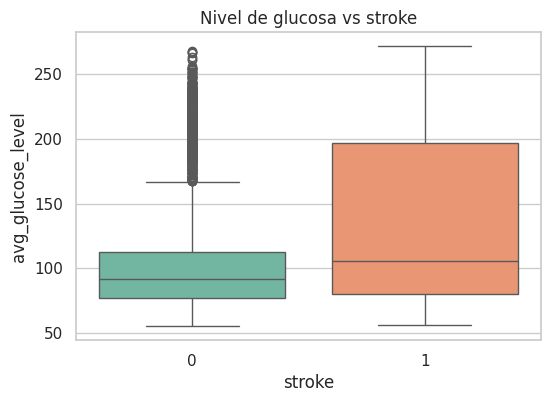

In [22]:
# Glucosa vs Stroke´
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette='Set2')
plt.title('Nivel de glucosa vs stroke')
plt.show()


## Los pacientes con niveles más altos de glucosa muestran mayor probabilidad de stroke. Puede relacionarse con diabetes o metabolismo alterado.

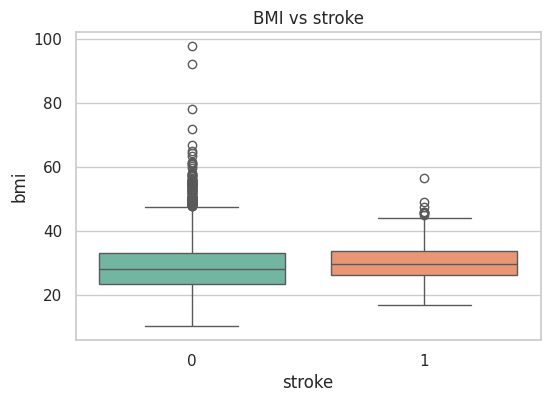

In [23]:
# BMI vs Stroke
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='stroke', y='bmi', palette='Set2')
plt.title('BMI vs stroke')
plt.show()


## El BMI tiene diferencias pequeñas entre grupos. Puede no ser un factor determinante por sí solo.

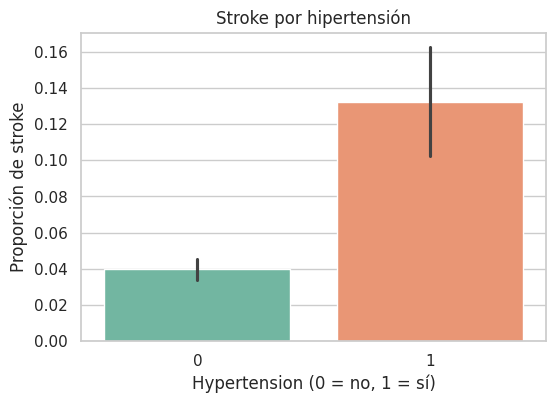

In [24]:
# Hipertensión vs Stroke
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x='hypertension',
    y='stroke',
    estimator='mean',
    palette='Set2'
)
plt.title('Stroke por hipertensión')
plt.xlabel('Hypertension (0 = no, 1 = sí)')
plt.ylabel('Proporción de stroke')
plt.show()


## Los pacientes hipertensos muestran una proporción mayor de stroke. Es un factor de riesgo muy importante a considerar.

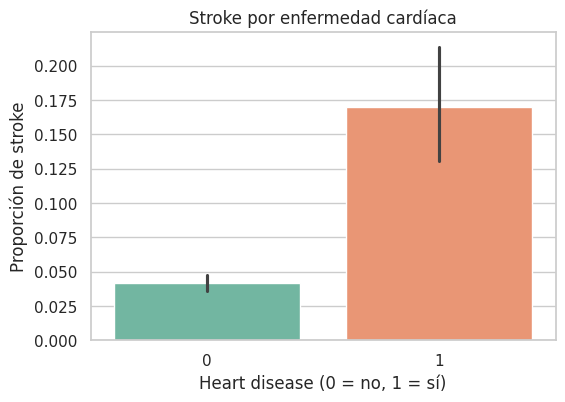

In [25]:
# Enfermedad cardíaca vs Stroke
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x='heart_disease',
    y='stroke',
    estimator='mean',
    palette='Set2'
)
plt.title('Stroke por enfermedad cardíaca')
plt.xlabel('Heart disease (0 = no, 1 = sí)')
plt.ylabel('Proporción de stroke')
plt.show()


## La presencia de enfermedad cardíaca incrementa claramente el riesgo de stroke.

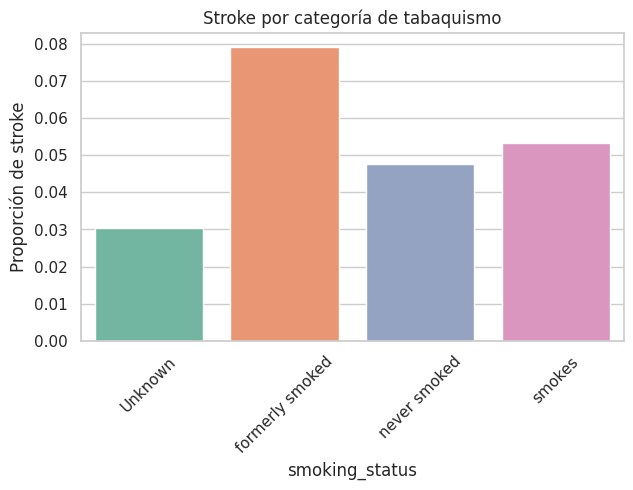

In [26]:
# Tabaquismo vs Stroke
plt.figure(figsize=(7,4))
prop = df.groupby('smoking_status')['stroke'].mean().reset_index()

sns.barplot(
    data=prop,
    x='smoking_status',
    y='stroke',
    palette='Set2'
)
plt.title('Stroke por categoría de tabaquismo')
plt.ylabel('Proporción de stroke')
plt.xticks(rotation=45)
plt.show()


## Los datos muestran diferencias entre categorías, pero no tan marcadas como en hipertensión o edad. El tabaquismo puede influir, pero no es el predictor más fuerte en este dataset.

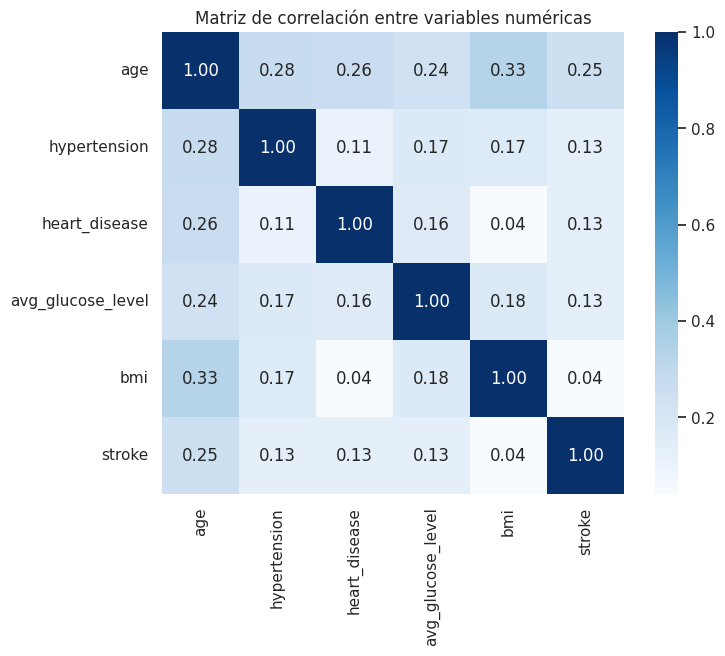

In [27]:
# CELDA DE CÓDIGO — Matriz limpia de correlación
# Seleccionar solo columnas numéricas relevantes
num_cols = ['age', 'hypertension', 'heart_disease',
            'avg_glucose_level', 'bmi', 'stroke']

corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


## Mayor correlación con stroke:

age (0.25): el riesgo aumenta con la edad

avg_glucose_level (0.13): niveles elevados de glucosa están asociados a un mayor riesgo

hypertension (0.12) y heart_disease (0.13): ambos factores clínicos influyen de forma moderada

BMI presenta poca correlación directa



## **Conclusiones del EDA**

Tras analizar el dataset de stroke prediction, se pueden extraer los siguientes insights:

✔ 1. La variable objetivo está fuertemente desbalanceada

Solo un pequeño porcentaje de pacientes sufrió un stroke.
Esto será importante si se construye un modelo predictivo.

✔ 2. La edad es el factor más determinante

Los pacientes que sufrieron stroke son significativamente mayores.
El riesgo aumenta progresivamente con la edad.

✔ 3. La glucosa en sangre también tiene un impacto claro

Los pacientes con mayor avg_glucose_level presentan un riesgo más elevado, lo que puede estar relacionado con diabetes o desregulación metabólica.

✔ 4. La hipertensión y la enfermedad cardíaca incrementan el riesgo

Ambas variables muestran una proporción notablemente mayor de stroke, reforzando su papel como factores clínicos críticos.

✔ 5. El BMI tiene poca relación directa

Aunque valores extremos pueden influir, en general no se observa una relación fuerte con stroke.

✔ 6. El tabaquismo muestra diferencias, pero no es el predictor más fuerte

Puede influir, pero su importancia es menor comparada con edad o datos clínicos.